In [63]:
import tensorflow as tf
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import cv2
import tools

In [64]:
__dataset_location = "G:/master_thesis_data/Datasets/nyu/nyu_hand_dataset_v2/dataset"

In [65]:
def __preprocess_dataset(dataset_path):
    subsets = ["train", "test"]
    for subset in subsets:
        matfile = sio.loadmat(os.path.join(dataset_path, subset, "joint_data.mat"))
        joint_names = matfile["joint_names"]
        joint_names = joint_names.reshape((-1))
        joint_names = np.array([joint[0] for joint in joint_names])
        joint_uvd = matfile["joint_uvd"]
        joint_uvd = np.array(joint_uvd)
        joint_xyz = matfile["joint_xyz"]
        
        print(joint_names, joint_uvd, joint_xyz)

__preprocess_dataset(dataset_path=__dataset_location)

['F1_KNU3_A' 'F1_KNU3_B' 'F1_KNU2_A' 'F1_KNU2_B' 'F1_KNU1_A' 'F1_KNU1_B'
 'F2_KNU3_A' 'F2_KNU3_B' 'F2_KNU2_A' 'F2_KNU2_B' 'F2_KNU1_A' 'F2_KNU1_B'
 'F3_KNU3_A' 'F3_KNU3_B' 'F3_KNU2_A' 'F3_KNU2_B' 'F3_KNU1_A' 'F3_KNU1_B'
 'F4_KNU3_A' 'F4_KNU3_B' 'F4_KNU2_A' 'F4_KNU2_B' 'F4_KNU1_A' 'F4_KNU1_B'
 'TH_KNU3_A' 'TH_KNU3_B' 'TH_KNU2_A' 'TH_KNU2_B' 'TH_KNU1_A' 'TH_KNU1_B'
 'PALM_1' 'PALM_2' 'PALM_3' 'PALM_4' 'PALM_5' 'PALM_6'] [[[[180.12895203 195.42758179 731.06890869]
   [180.93917847 205.4382782  733.58355713]
   [183.36901855 218.60119629 738.61517334]
   ...
   [202.03186035 270.98693848 750.78216553]
   [218.66824341 287.33966064 765.08984375]
   [209.30264282 328.73101807 772.46392822]]

  [[180.12895203 195.42758179 731.06890869]
   [180.93917847 205.4382782  733.58355713]
   [183.36901855 218.60119629 738.61517334]
   ...
   [202.03186035 270.98693848 750.78216553]
   [218.66824341 287.33966064 765.08984375]
   [209.30264282 328.73101807 772.46392822]]

  [[180.12646484 195.43887329 731

In [66]:
matfile = sio.loadmat(os.path.join(__dataset_location, "train", "joint_data.mat"))

In [67]:
joint_names = matfile["joint_names"]
joint_names = joint_names.reshape((-1))
joint_names = np.array([joint[0] for joint in joint_names])
num_joints = len(joint_names)

print(joint_names)
print(len(joint_names))

['F1_KNU3_A' 'F1_KNU3_B' 'F1_KNU2_A' 'F1_KNU2_B' 'F1_KNU1_A' 'F1_KNU1_B'
 'F2_KNU3_A' 'F2_KNU3_B' 'F2_KNU2_A' 'F2_KNU2_B' 'F2_KNU1_A' 'F2_KNU1_B'
 'F3_KNU3_A' 'F3_KNU3_B' 'F3_KNU2_A' 'F3_KNU2_B' 'F3_KNU1_A' 'F3_KNU1_B'
 'F4_KNU3_A' 'F4_KNU3_B' 'F4_KNU2_A' 'F4_KNU2_B' 'F4_KNU1_A' 'F4_KNU1_B'
 'TH_KNU3_A' 'TH_KNU3_B' 'TH_KNU2_A' 'TH_KNU2_B' 'TH_KNU1_A' 'TH_KNU1_B'
 'PALM_1' 'PALM_2' 'PALM_3' 'PALM_4' 'PALM_5' 'PALM_6']
36


In [68]:
joint_uvd = matfile["joint_uvd"]
joint_uvd = np.array(joint_uvd[0]) # throw away data for Kinect #2 & #3, only keep #1
print(joint_uvd.shape)
print(joint_uvd[0])

(72757, 36, 3)
[[180.12895203 195.42758179 731.06890869]
 [180.93917847 205.4382782  733.58355713]
 [183.36901855 218.60119629 738.61517334]
 [185.69302368 228.00753784 741.11590576]
 [188.33966064 236.31771851 741.42492676]
 [189.75479126 251.73051453 737.0546875 ]
 [212.48039246 172.75382996 737.74401855]
 [209.51385498 185.0696106  743.51153564]
 [208.33184814 201.69996643 748.22961426]
 [207.64732361 211.90805054 746.93328857]
 [210.79849243 226.05383301 752.78277588]
 [211.28619385 241.19741821 750.3928833 ]
 [234.63534546 164.74453735 741.19708252]
 [231.48895264 178.79653931 745.95092773]
 [228.34506226 195.41593933 753.50842285]
 [226.31417847 206.4229126  755.62774658]
 [226.72050476 227.10845947 758.39910889]
 [227.86282349 245.57444763 754.88354492]
 [257.07202148 176.44560242 740.67175293]
 [254.85145569 187.48886108 741.69573975]
 [252.96730042 202.74162292 747.17980957]
 [251.12730408 214.33078003 754.72381592]
 [249.48547363 233.01765442 758.07965088]
 [247.22744751 255.

In [74]:
image_path = r"G:\master_thesis_data\Datasets\nyu\nyu_hand_dataset_v2\dataset\train\rgb_1_0000001.png"
image = cv2.imread(image_path)

22


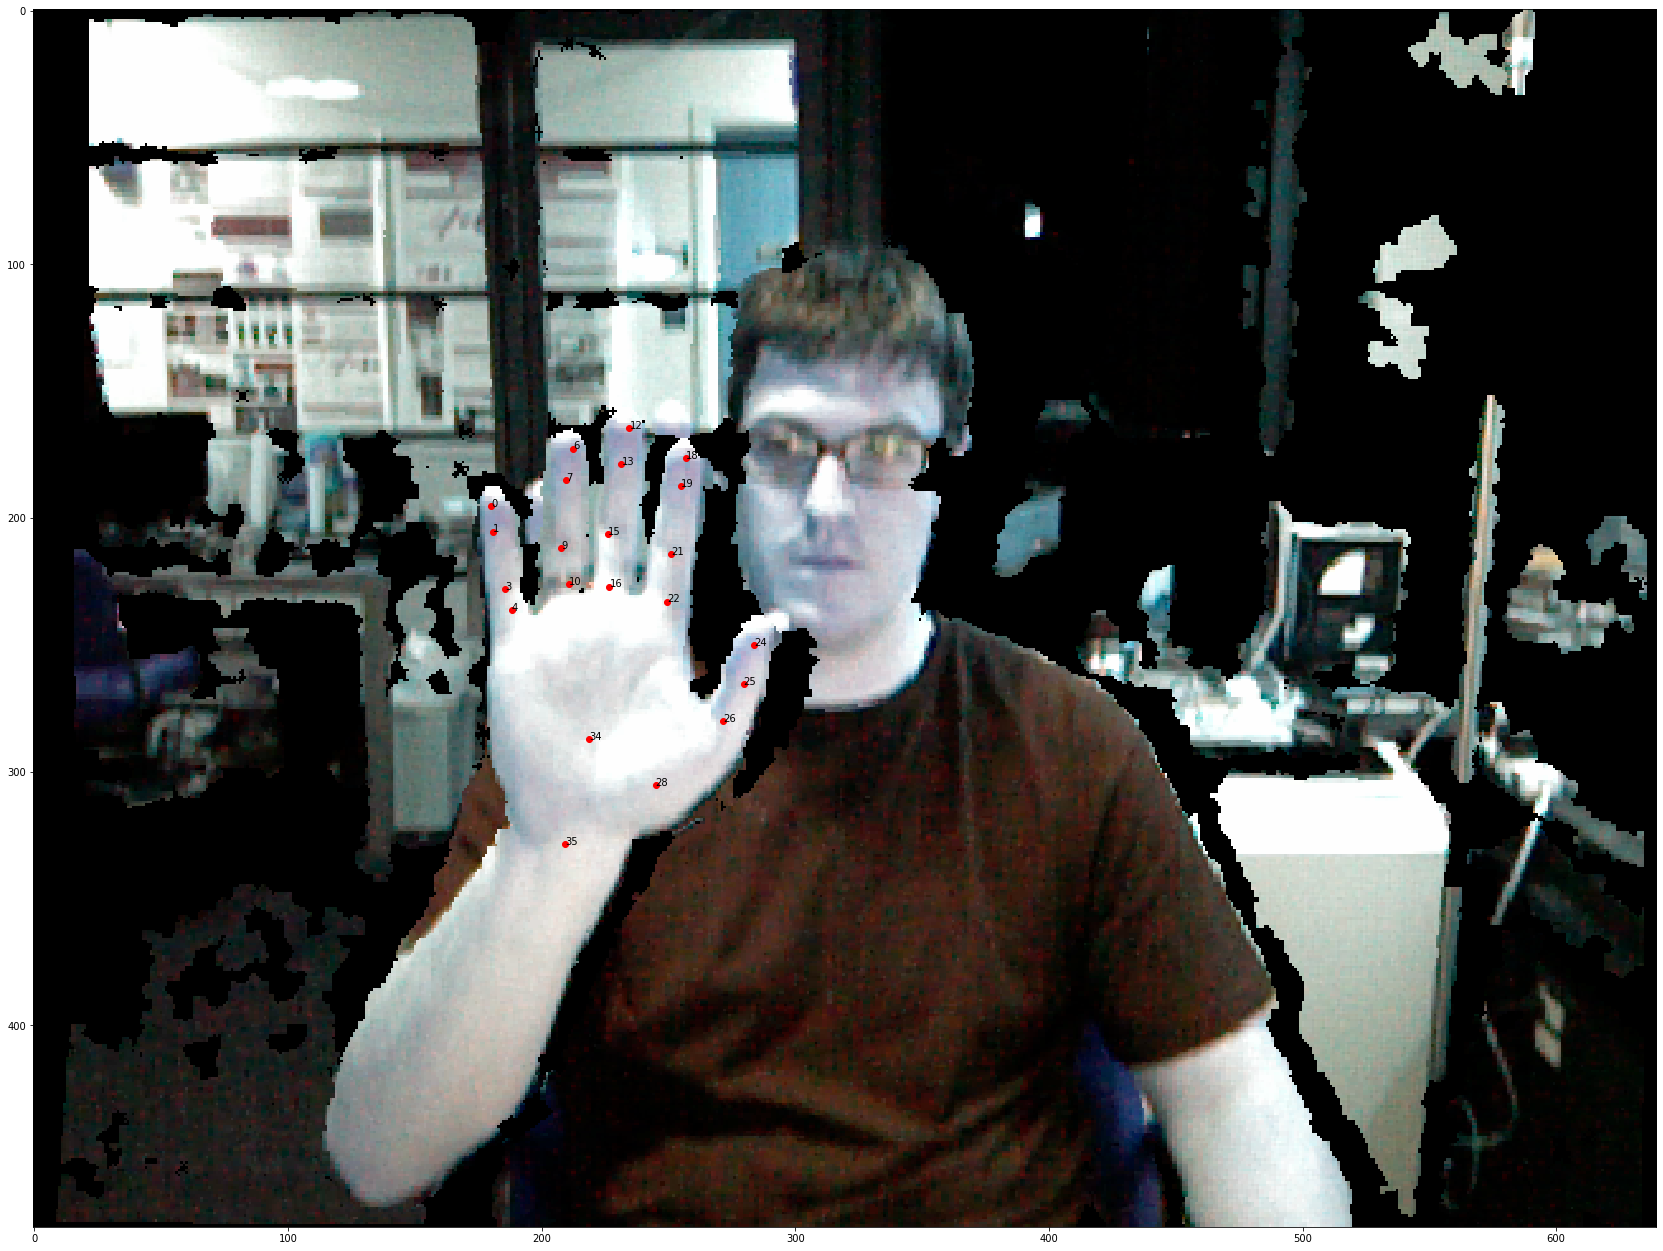

In [87]:
joint_uvd_plot = joint_uvd.take([0, 1], 2)
fig = plt.figure(figsize=(64, 64))
ax = fig.add_subplot(221)
ax.imshow(image)
useful_indices = \
    [0, 1, 3, 4, 6, 7, 9, 10, 12, 13, 15, 16, 18, 19,
     21, 22, 24, 25, 26, 28, 34, 35]
print(len(useful_indices))
joint_uvd_plot = joint_uvd_plot.take(useful_indices, 1)
x, y = zip(*joint_uvd_plot[0])
ax.scatter(x, y, c='r')
for i, txt in enumerate(useful_indices):
    ax.annotate(txt, (x[i], y[i]))

In [89]:
joint_uvd_reduced = joint_uvd.take(useful_indices, 1)

print(joint_uvd_reduced[0])


[[180.12895203 195.42758179 731.06890869]
 [180.93917847 205.4382782  733.58355713]
 [185.69302368 228.00753784 741.11590576]
 [188.33966064 236.31771851 741.42492676]
 [212.48039246 172.75382996 737.74401855]
 [209.51385498 185.0696106  743.51153564]
 [207.64732361 211.90805054 746.93328857]
 [210.79849243 226.05383301 752.78277588]
 [234.63534546 164.74453735 741.19708252]
 [231.48895264 178.79653931 745.95092773]
 [226.31417847 206.4229126  755.62774658]
 [226.72050476 227.10845947 758.39910889]
 [257.07202148 176.44560242 740.67175293]
 [254.85145569 187.48886108 741.69573975]
 [251.12730408 214.33078003 754.72381592]
 [249.48547363 233.01765442 758.07965088]
 [283.74005127 250.08482361 730.20855713]
 [279.66415405 265.65515137 740.08532715]
 [271.50909424 280.22988892 748.60418701]
 [244.95599365 305.35336304 747.2623291 ]
 [218.66824341 287.33966064 765.08984375]
 [209.30264282 328.73101807 772.46392822]]


In [91]:
basedir = os.path.join(__dataset_location, "train")
pattern = "rgb_1_"
images = [f for f in os.listdir(__dataset_location) 
          if os.path.isfile(os.path.join(basedir, f)) 
          and pattern in f]
joint_names = joint_names[useful_indices]
print(joint_names)
win_name = "test"
window = cv2.namedWindow(win_name)
for i in range(70000):
    img = cv2.imread(images[i])
    skel = joint_uvd_reduced[i]
    skel = skel.take([0, 1], 1)
    rendered = tools.render_skeleton(img, skel, True, )
    cv2.imshow(win_name, rendered)
        

['F1_KNU3_A' 'F1_KNU3_B' 'F1_KNU2_B' 'F1_KNU1_A' 'F2_KNU3_A' 'F2_KNU3_B'
 'F2_KNU2_B' 'F2_KNU1_A' 'F3_KNU3_A' 'F3_KNU3_B' 'F3_KNU2_B' 'F3_KNU1_A'
 'F4_KNU3_A' 'F4_KNU3_B' 'F4_KNU2_B' 'F4_KNU1_A' 'TH_KNU3_A' 'TH_KNU3_B'
 'TH_KNU2_A' 'TH_KNU1_A' 'PALM_5' 'PALM_6']


IndexError: list index out of range